## <l style= "text-align: center"><p style= "color: crimson">*Modelo de Crecimiento Poblacional*</p></l>
---
![](img/cuba3.jpeg)

---

#### <p style= "color: cyan">*Bibliotecas & Módulos*</p>
---

In [52]:
import numpy as np
from pandas import read_csv, DataFrame
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#### <p style= "color: cyan">Datos *(Oficina Nacional de Estadísticas e Información (ONEI))*</p>
---


In [53]:
#Lectura del dataset:
data_set = read_csv("data/csv/poblacion-residente.csv")
data_set = DataFrame(data_set)
indices_years = [x for x,y in enumerate(list(data_set["CONCEPTO"]))] #Años
print(f"Tiempos (1980-2022): \n{indices_years}\n")

val_poblacion = list(data_set["Total"]) #Valores de P(t)
n = len(val_poblacion) #Tamaño en datos
print(f"Cantidad de valores: {n}\n")
print(f"Valores de Densidad Poblacional: \n{val_poblacion}\n")

r = list(data_set["Tasa"]) #Tasas
print(f"Valores de tasa de crecimiento anual de la poblacion: \n{r}")



Tiempos (1980-2022): 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

Cantidad de valores: 43

Valores de Densidad Poblacional: 
[9693907, 9753243, 9844836, 9938760, 10032721, 10138642, 10228330, 10334993, 10443789, 10548347, 10662148, 10756829, 10829320, 10895987, 10912924, 10947119, 10983326, 11033993, 11076817, 11113128, 11146203, 11168526, 11200388, 11215388, 11217590, 11218623, 11202632, 11188028, 11173996, 11174952, 11167934, 11175423, 11173151, 11210064, 11238317, 11239004, 11239224, 11221060, 11209628, 11193470, 11181595, 11113215, 11089511]

Valores de tasa de crecimiento anual de la poblacion: 
[-6.2, 6.1, 9.3, 9.5, 9.4, 10.5, 8.8, 10.4, 10.5, 10.0, 11.1, 8.8, 6.7, 6.1, 1.6, 3.1, 3.3, 4.6, 3.9, 3.3, 3.0, 2.0, 2.8, 1.3, 0.2, 0.1, -1.4, -1.3, -1.3, 0.1, -0.6, 0.7, -0.2, 3.3, 2.5, 0.1, 0.0, -1.6, -1.0, -1.4, -1.1, -6.1, -2.1]


In [54]:
#Convertir a array para trabajar los datos como vectores:
t_data = np.array(indices_years)
P_data = np.array(val_poblacion)

#### <p style= "color: cyan">*Función Logística*</p>
---
Se define por la forma: $P(t) = \dfrac{K}{1 + Ae^{-rt}}$
donde se tiene como parámetros:
- K => Capacidad de carga poblacional (Parámetro a estimar)
- r => Tasa de crecimiento intrinseca (Parámetro a estimar)
- A => Constante que depende de las condiciones iniciales de la población: $\left(A=\dfrac{K}{P(0)} -1\right)$

In [55]:
# Definicion de la función logística:

def gen_log(p0):
    def logistic_function(t, K, r):
        return K / (1 + (K/p0 - 1) * np.exp(-r * t))
    return logistic_function

f = gen_log(P_data[0])


#### <p style="color:cyan"> Estimación de Parámetros</p>
---
La siguiente celda de código ajustará la función logística a los datos observados, buscando los valores óptimos de $(K)$ y $(r)$ que minimicen la diferencia entre los datos observados y los predichos por el modelo. 

Observaciones:
- La función `curve_fit` del modulo `scipy.optimize` devuelve dos arrays: `popt`, que contiene los *parámetros estimados* , y `pcov`, que contiene la *covarianza de los parámetros estimados*.
- La función `curve_fit` es parte de la biblioteca `SciPy` y se utiliza para ajustar una función a un conjunto de datos mediante el método de *mínimos cuadrados*. Su objetivo principal es encontrar los parámetros de la función que minimizan la diferencia entre los valores observados y los predichos por la función

In [56]:
# Parámetros iniciales:
initial_guess = [10000000, 0.01]  # Asume un valor inicial para K y r

# Ajustar el modelo a los datos observados
popt, pcov = curve_fit(f, t_data, P_data, p0=initial_guess, sigma=None, absolute_sigma=False)

# Imprimir los parámetros estimados
print("Parámetros estimados:", popt)


Parámetros estimados: [1.12801228e+07 1.04126978e-01]


In [57]:
#Luego se formatean los datos:
params_formateados = [format(param, ".2f") for param in popt]
print("Parametros formateados: \n", params_formateados)

#Asignacion:
K = float(params_formateados[0])
K = int(K) #Parametro K
r_intr = float(params_formateados[1]) # Tasa intrinseca de crecimiento r
print(f"K = {K}\nr = {r_intr}")


Parametros formateados: 
 ['11280122.85', '0.10']
K = 11280122
r = 0.1


#### <p style= "color: cyan">*Comparación Datos Reales vs Evaluaciones de la Función Logística (1980-2020)*</p>
---

Reales vs Predicción
9693907 Vs 9693907
9753243 Vs 9825388
9844836 Vs 9947469
9938760 Vs 10060577
10032721 Vs 10165161
10138642 Vs 10261683
10228330 Vs 10350614
10334993 Vs 10432421
10443789 Vs 10507566
10548347 Vs 10576498
10662148 Vs 10639655
10756829 Vs 10697455
10829320 Vs 10750299
10895987 Vs 10798566
10912924 Vs 10842615
10947119 Vs 10882782
10983326 Vs 10919385
11033993 Vs 10952717
11076817 Vs 10983053
11113128 Vs 11010648
11146203 Vs 11035736
11168526 Vs 11058535
11200388 Vs 11079247
11215388 Vs 11098054
11217590 Vs 11115126
11218623 Vs 11130620
11202632 Vs 11144676
11188028 Vs 11157425
11173996 Vs 11168986
11174952 Vs 11179468
11167934 Vs 11188969
11175423 Vs 11197580
11173151 Vs 11205382
11210064 Vs 11212452
11238317 Vs 11218857
11239004 Vs 11224658
11239224 Vs 11229913
11221060 Vs 11234671
11209628 Vs 11238981
11193470 Vs 11242883
11181595 Vs 11246416


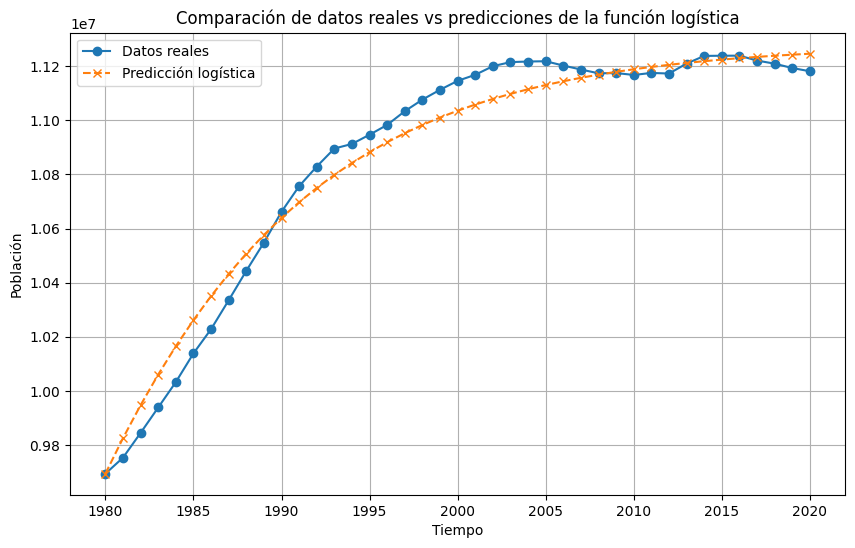

In [62]:
def logistic_function(t, K, r):
    return K / (1 + (K/P_data[0] - 1) * np.exp(-r * t))
# Valores predichos por la función logística
predicted_population = logistic_function(t_data[:-2], K, r_intr)
predicted_population = [int(x) for x in predicted_population]
print("Reales vs Predicción\n=====================")
for i,j in zip(list(P_data[:-2]), list(predicted_population)):
    print(i, "Vs", j)

years = np.arange(1980,2021) #Vector de años

# Plot de los datos reales vs los predichos
plt.figure(figsize=(10, 6))
plt.plot(years, P_data[:-2], label='Datos reales', marker='o', linestyle='-')
plt.plot(years, predicted_population, label='Predicción logística', marker='x', linestyle='--')

plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Comparación de datos reales vs predicciones de la función logística')
plt.legend()

plt.grid(True)
plt.show()

#### <p style= "color: cyan">*Exactitud del modelo*</p>
---

Primero, dado que se está trabajando con un modelo de regresión logística, una alternativa adecuada sería el error absoluto medio *(MAE - Mean Absolute Error)* o el error relativo medio (RMSE - Root Mean Square Error), entre las predicciones y los datos reales (ambos expresados en porcentaje).
- El MAE mide la diferencia absoluta promedio entre los valores observados y los predichos. 
- Para convertirlo en un porcentaje, se divide el MAE por el valor promedio real y se multiplica por 100.

In [59]:
mae = np.mean(np.abs(np.array(P_data[:-2]) - np.array(predicted_population)))
maep = (mae / np.mean(P_data[:-2])) * 100
print(f"Error Absoluto Medio (MAE) en Porcentaje: {maep:.2f}%")

Error Absoluto Medio (MAE) en Porcentaje: 0.59%


*Otra alternativa:*

- El RMSE es la raíz cuadrada del error cuadrático medio (MSE). Similar al MAE.

In [60]:
mse = np.mean((np.array(P_data[:-2]) - np.array(predicted_population))**2) #MSE
rmse = np.sqrt(mse)
rmsep = (rmse / np.mean(P_data[:-2])) * 100
print(f"Error Relativo Medio (RMSE) en Porcentaje: {rmsep:.2f}%")

Error Relativo Medio (RMSE) en Porcentaje: 0.70%


*Interpretacion:*

- Valor Bajo: Es considerado bastante bajo, lo que sugiere que el modelo hace predicciones bastante precisas en relación con los valores observados. 

Consideraciones Adicionales: 
- Es importante recordar que el RMSE es sensible a valores atípicos y depende de la escala de los datos. Además, aunque un RMSE bajo es deseable, también es crucial considerar otros aspectos del modelo, como la capacidad de generalización y la simplicidad del modelo, para asegurar que el modelo sea tanto preciso como práctico para su aplicación específica.

En conclusión, los valores del MAE y el RMSE obtenidos indican un buen ajuste al modelo, sugiriendo que las predicciones están cerca de los valores observados. Sin embargo, siempre es recomendable contextualizar este valor dentro del marco de tu proyecto específico y considerar múltiples métricas y aspectos del modelo para tomar decisiones informadas.

# <l style= "text-align: center"><p style= "color: crimson">*Predicción*</p></l>
---

Años	Predicción
2020 	 11246416
2021 	 11249615
2022 	 11252511
2023 	 11255133
2024 	 11257506
2025 	 11259654
2026 	 11261599
2027 	 11263359
2028 	 11264952
2029 	 11266394
2030 	 11267699


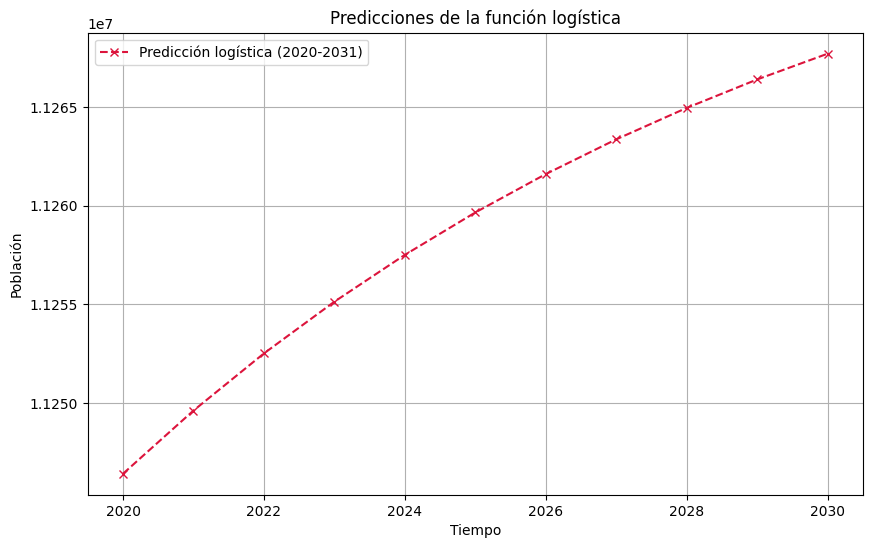

In [97]:
#Tiempos para predecir
extended_t_data = np.arange(40,51)
predicted_population2030 = logistic_function(extended_t_data, K, r_intr)
predicted_population2030 = [int(x) for x in predicted_population2030]
years_prediction = np.arange(2020,2031) #Vector de años
print("Años\tPredicción\n==================")
for i, j in zip(years_prediction,list(predicted_population2030)):
    print(i,"\t",j)

plt.figure(figsize=(10, 6))
plt.plot(years_prediction, predicted_population2030, label='Predicción logística (2020-2031)', marker='x', linestyle='--', color="crimson")

plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Predicciones de la función logística')
plt.legend()

plt.grid(True)
plt.show()


Años	Predicción
1980 	 9693907
1981 	 9825388
1982 	 9947469
1983 	 10060577
1984 	 10165161
1985 	 10261683
1986 	 10350614
1987 	 10432421
1988 	 10507566
1989 	 10576498
1990 	 10639655
1991 	 10697455
1992 	 10750299
1993 	 10798566
1994 	 10842615
1995 	 10882782
1996 	 10919385
1997 	 10952717
1998 	 10983053
1999 	 11010648
2000 	 11035736
2001 	 11058535
2002 	 11079247
2003 	 11098054
2004 	 11115126
2005 	 11130620
2006 	 11144676
2007 	 11157425
2008 	 11168986
2009 	 11179468
2010 	 11188969
2011 	 11197580
2012 	 11205382
2013 	 11212452
2014 	 11218857
2015 	 11224658
2016 	 11229913
2017 	 11234671
2018 	 11238981
2019 	 11242883
2020 	 11246416
2021 	 11249615
2022 	 11252511
2023 	 11255133
2024 	 11257506
2025 	 11259654
2026 	 11261599
2027 	 11263359
2028 	 11264952
2029 	 11266394
2030 	 11267699


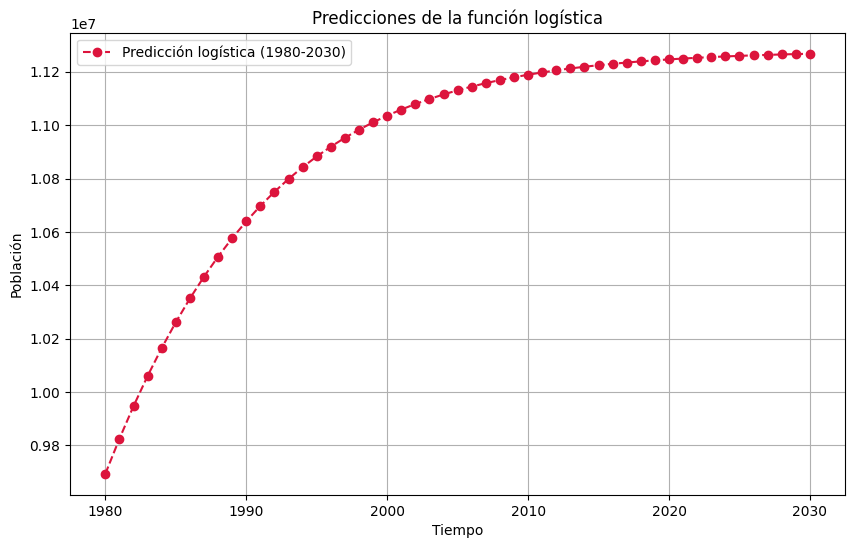

In [99]:
#Tiempo extendido
extended_t_data = np.arange(0,51)
predicted_population2030 = logistic_function(extended_t_data, K, r_intr)
predicted_population2030 = [int(x) for x in predicted_population2030]
years_prediction = np.arange(1980,2031) #Vector de años
print("Años\tPredicción\n==================")
for i, j in zip(years_prediction,list(predicted_population2030)):
    print(i,"\t",j)

plt.figure(figsize=(10, 6))
plt.plot(years_prediction, predicted_population2030, label='Predicción logística (1980-2030)', marker='o', linestyle='--', color="crimson" )

plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Predicciones de la función logística')
plt.legend()

plt.grid(True)
plt.show()